In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [18]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
##MODEL VE TAHMİN
rf_model=RandomForestRegressor(random_state=42).fit(X_train,y_train)

In [20]:
rf_model

RandomForestRegressor(random_state=42)

In [21]:
y_pred=rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

305.03231392023173

In [22]:
##model turing

In [23]:
rf_model=RandomForestRegressor(random_state=42).fit(X_train,y_train)
rf_model

RandomForestRegressor(random_state=42)

In [26]:
rf_params={"max_depth":[5,8,10],"max_features":[1,2,5,10],"n_estimators":[200,500,1000,2000],"min_samples_split":[2,10,80,200]}

In [27]:
rf_cv_odel=GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [28]:
rf_cv_odel.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [29]:
rf_model=RandomForestRegressor(random_state=42,max_depth=8,max_features=2,min_samples_split=2,n_estimators=200)
rf_tunned=rf_model.fit(X_train,y_train)

In [30]:
rf_tunned

RandomForestRegressor(max_depth=8, max_features=2, n_estimators=200,
                      random_state=42)

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
y_pred=rf_tunned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

323.2211498680023

In [33]:
rf_tunned.feature_importances_*100

array([5.66516502, 5.84909497, 4.05906431, 4.6671914 , 5.86490807,
       5.37761103, 6.18859168, 9.6125664 , 9.30181612, 8.27097571,
       8.32946824, 8.65487693, 8.32586289, 4.32939121, 2.03151689,
       1.8159306 , 0.44350027, 0.8516713 , 0.36079695])

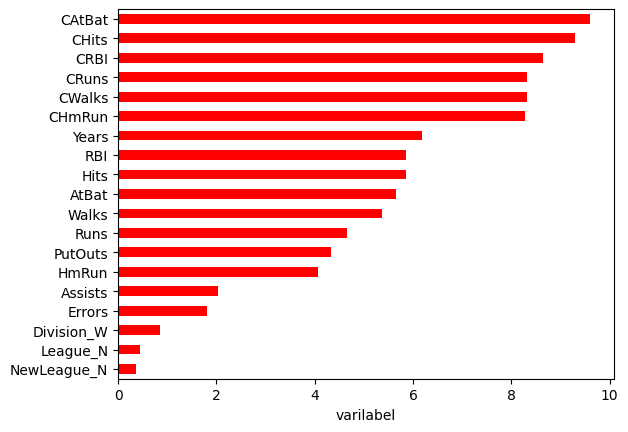

In [35]:
#değşken önem düzeyi
Importance=pd.DataFrame({"Importance":rf_tunned.feature_importances_*100},index=X_train.columns)


Importance.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh",color="r",)

plt.xlabel("varilabel")
plt.gca().legend_=None
